In [3]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


**Классификация данных** - это контролируемый процесс обучения интеллектуальному анализу данных, направленный на классификацию набора точек данных или паттернов.


Классификация данных - это контролируемый процесс обучения добычи данных, направленный на классификацию набора точек данных или паттернов. Как и в случае регрессионных методов, целью алгоритмов классификации является построение модели, которая может предсказать значение зависимой переменной из независимых. Разница между регрессией и классификацией заключается в том, что зависимый атрибут является числовым для регрессии и категориальным для классификации. Классы иногда называют целями, метками или категориями.

Машинное обучение (Machine learning)
==

Задачи:
* Классификация
* Кластеризация
* Регрессия (прогноз)
* Детекция аномалий

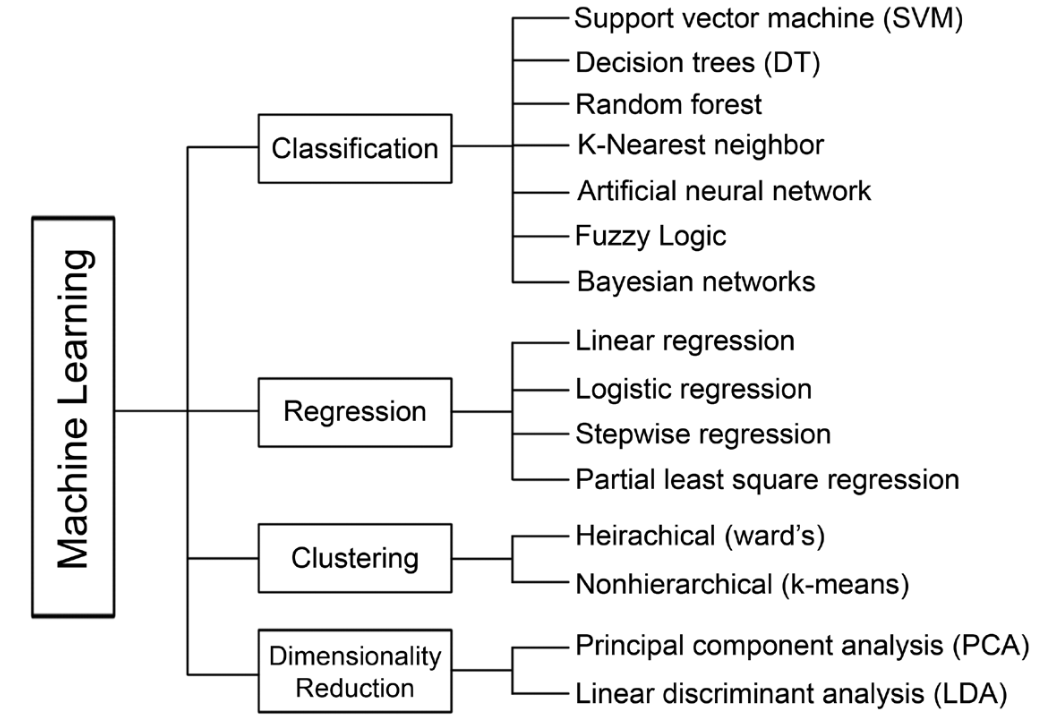

### ML - это круто!

Рассмотрим [анкету парня Attila Kertesz-Farkas](https://scholar.google.com/citations?user=PcFnWhoAAAAJ&hl=ru)
Самые цитируемые работы, выполненные в 2000-х годах - по классификации последовательностей белков.
То есть он сделал успешную карьеру как биоинформатик.

И...  теперь работает в Высшей Школе Экономики. ... то, что сейчас у вас в мозге - называется когнитивный диссонанс. Разрешается противоречие очень просто - за использование методов машинного обучения - хорошо платят в самых разных областях. А в ВШЭ платят хорошо.


Beeline - 100 000 за практический курс
[Интенсивный курс по изучению машинного обучения и анализа данных](http://bigdata.beeline.digital/#about)

[Введение в Data Science](http://bigdata.beeline.digital/introductory#schedule) за 20 000 Р практически включен в данный курс.

# Применение

### Подбор оптимальных сочетаний, конфигураций

http://link.springer.com/article/10.1007/s10822-016-9960-x

отбор признаков для анализа
https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-016-3320-z

### Классификация сигналов
https://arxiv.org/pdf/1612.05489.pdf

### Облачная робототехника (Cloud Robotics)
Робот - учится и применяет новое знание с долей автономности.

Робот использует вычисления, хранилище данных и помощь человека из "облака". Требует подключения к сети (хотя бы частичного). В зависимости от применения особые условия к задержкам, пропускной способности (ширине) канала, области покрытия.

Машинное обучение изучает, как автоматически научиться получать знания и делать прогнозы на основе прошлых наблюдений. В машинном обучении классификация данных - это задача определения того, к какому из множества классов принадлежит новое наблюдение, исходя из знаний, полученных в результате анализа обучающего набора данных, состоящего из наблюдений, для которых известен класс принадлежности. Каждое наблюдение задается точкой данных или паттерном, состоящим из измеренных значений входных переменных, которые также называются независимыми переменными или предикторами. Выходная переменная также называется зависимой переменной и содержит метку класса, присвоенного точке данных.


Классификационная модель требует этапа обучения, необходимого для обучения модели правильной классификации паттернов, и этапа тестирования, на котором производительность алгоритма измеряется путем применения классификатора к тестовому набору.

Обучающий набор состоит из точек данных, уже правильно классифицированных, и используется для обучения классификатора. Классификация машинного обучения охватывает множество областей применения: примерами областей, в которых применяются алгоритмы классификации машинного обучения, являются распознавание лиц, обработка естественного языка, анализ настроений и биоинформатика.

### Недо и переобучение

The quality of a machine learning classifier is related to its capacity to be robust to underfitting and overfitting.

An underfitting problem occurs when the number of incorrectly classified patterns is not negligible: the evaluation of the presence of underfitting is given by measuring after the learning phase classification indexes as accuracy, recall, and precision.

Underfitting does not depend on the randomness of the training data but on the excessive simplification of the learning model, for example, if the number of nodes in a decision tree or of neurons in a network is insufficient. To solve the underfitting problem we must reconstruct the classification model using more information.

Overfitting occurs when, even if the data in the training set are optimally fitted, the classifier’s performances measured using the test set are poor: in this case, the model adapts extremely well to the training set, providing very low training errors, but it fails to classify patterns belonging to the test set just as well. For example, in the training phase the number of neurons in the hidden layers of a neural network could be increased in order to obtain negligible training errors, but, nevertheless, the test error can be high: this is probably due to the presence of noisy data in the training sets to which the network has adapted during the training phase or to the fact that the training set is scanty.

# Классификационные модели

В литературе существует множество классификационных моделей машинного обучения. Их можно разделить на следующие группы:

#### Логистическая Регрессия

Логистическая регрессия [1] - это статистический метод, выполняющий прогностический анализ для измерения взаимосвязи между зависимой переменной и независимыми переменными (предикторами), оценивая вероятности с помощью логистической функции: эти вероятности впоследствии преобразуются в двоичные значения и результат прогноза присваивается наиболее близкому классу.

Алгоритм логистической регрессии использует логистическую функцию для моделирования двоичных выходных переменных, помеченных, например, как true или false. Логарифм вероятности принадлежности точки к классу true задается линейной комбинацией входных переменных, коэффициенты которых вычисляются с помощью метода максимального правдоподобия и путем установки порогового значения для этой вероятности точка классифицируется как принадлежащая классу true, если эта вероятность больше порогового значения.

Метод логистической регрессии может быть распространен на многозначные или непрерывные выходные переменные.

Этот метод прост в реализации и использовании. Для того чтобы быть примененным, необходимо, чтобы не было высоких корреляций между предикторами: этот контроль может быть оценен путем вычисления корреляционной матрицы между входными переменными. Основное ограничение этого метода заключается в том что он не может быть использован при наличии большого количества входных переменных, иначе модель может привести к переобучению.

#### Наивный Байесовский Классификатор

Наивный Байес [2, 3] - это метод классификации, основанный на теореме Байеса с допущением независимости входных переменных. Еще одним ограничением, накладываемым в методе, является то, что все входные переменные оказывают одинаковое влияние на результат, и ни одна входная переменная не определяет значение выходной переменной больше, чем другие. Теорема Байеса применяется для определения условных вероятностей характеристик задачи отнесения точки к классу с наибольшим значением вероятности.

Если входные переменные дискретны, то применяется полиномиальное распределение вероятностей для входных переменных: в этом случае используется частотная гистограмма входной переменной, где частота появления значения во входной переменной задается числом точек данных в обучающем наборе, в котором эта переменная принимает это значение.

Если входные переменные дискретны, то применяется гауссово распределение вероятностей. Другие наивные байесовские модели, в которых используются непрерывные входные переменные, дискретизируют эти переменные и используют распределения вероятностей Бернулли.

Несмотря на свою простоту, наивные байесовские методы часто превосходят более сложные методы классификации.

Основными преимуществами наивных байесовских алгоритмов являются их устойчивость по отношению к присутствию шума в данных и тот факт, что они быстры и просты в реализации, но их самым большим недостатком является требование независимости входных переменных в большинстве реальных случаев, они зависимы, и это влияет на производительность классификатора.

#### K-Ближайших Соседей

Алгоритм K-ближайших соседей (KNN) [4, 5] - это контролируемый алгоритм классификации, в котором подмножество помеченных точек используется для обучения классификации для обозначения других точек. Чтобы классифицировать новую точку, алгоритм анализирует K помеченных точек, ближайших к этой новой точке, называемых ее ближайшими соседями, присваивая новой точке класс, к которому принадлежит наибольшее число соседних точек.

Для вычисления расстояний между точками необходимо использовать меру расстояния: если используются числовые переменные, то общими метриками расстояния являются Евклидово, манхэттенское и Минковское расстояния. Расстояние Хэмминга обычно используется при наличии категориальных переменных.

Основным преимуществом алгоритма KNN является его простота использования и простота реализации. Кроме того, KNN не требует введения конкретных параметров или применения ограничений и ограничений.

С другой стороны, вычислительная сложность алгоритма возрастает экспоненциально по мере увеличения размера обучающего набора и количества входных переменных.

#### Дерево решений

Дерево Решений ([6]—Гл. 18) строит классификационные или регрессионные модели в виде древовидной структуры. Деревья решений строятся с использованием эвристики, называемой рекурсивным разбиением: алгоритм разбивает набор данных на все меньшие и меньшие подмножества, создавая в то же время ассоциированное дерево решений постепенно. Процесс останавливается, когда все точки данных в подмножествах достаточно однородны, или выполняется другой критерий остановки.

Конечная структура представляет собой дерево с узлами принятия решений и конечными узлами. Узел принятия решений имеет две или более ветвей, а конечный узел представляет классификацию или решение. Самый верхний узел принятия решений в дереве, который соответствует лучшему предиктору, называется корневым узлом. Деревья решений могут обрабатывать как категориальные, так и числовые данные.

Алгоритм дерева решений прост в построении и быстр в вычислительном отношении, а также обеспечивает хорошую производительность с точки зрения точности результатов классификации. Однако он подвержен проблеме переобучения: небольшие вариации обучающего набора могут также определять вариации, которые согласованы в дереве решений, а сложные деревья решений могут точно классифицировать точки данных в обучающем наборе, но не могут классифицировать новые точки данных.

#### Случайный Лес

Случайные леса или леса случайных решений [7, 8, 9] - это метод ансамблевого обучения, в котором строится множество деревьев решений во время обучения. Назначенный класс-это класс, возвращаемый наибольшим числом деревьев. Набор данных разбивается на большее количество выборок, и для каждой выборки строится дерево решений: классификация получается путем усреднения результатов многих деревьев решений. Эта стратегия позволяет смягчить или устранить проблему переоснащения. Фактически, разбиение обучающего набора данных на несколько подмножеств и построение дерева решений для каждого подмножества не приводит к ошибке точного моделирования одного обучающего набора.

Случайный лес более надежен, чем алгоритм дерева решений, чтобы избежать переоснащения модели, но он занимает больше времени, чем дерево решений, и для его реализации требуются дополнительные вычислительные ресурсы.

#### искусственная нейронная сеть

Многослойный персептронный классификатор искусственной нейронной сети состоит из блоков, называемых нейронами, расположенных слоями, которые преобразуют входной вектор в выходной, категориальный выход в задачах классификации ([10, 11]—гл.  6, [12]). Нейронная сеть строится из трех типов слоев: входного слоя. узлы которого связаны с входными переменными, скрытые слои, которые являются промежуточными слоями между входным и выходным слоями и местом, где выполняются все вычисления, и выходной слой, связанный с выходной переменной, который производит результат классификации.

Аксону, соединяющей два нейрона, принадлежащих одному слою, и строящемуся следующему слою, присваивается вес, соответственно, изначально заданный случайным образом. Нейронная сеть учится классифицировать паттерны на этапе обучения, в котором известен правильный класс для каждого паттерна, и сеть обучается, регулируя веса, чтобы предсказать правильную метку класса выборочных паттернов. Функция активации определяет, должен ли данный нейрон быть активирован или нет, основываясь на взвешенной сумме.

В литературе предлагаются различные типы нейронных сетей для классификации данных; они становятся очень мощными при использовании в гибридной системе со многими типами предсказательных нейронных сетей.

## Представление данных

набор данных преобразуется в виде матрицы размером `[n_samples, n_features]`: 

-  **n_samples**: Количество объектов (образцов, samples). Образцом может быть документ, изображение, звуко- или видеозапись, одно измерение прибора, обследование одного пациента, один образец живой ткани или что-то, что можно описать фиксированным набором количественных характеристик.
-  **n_features**: Количество характеристик (показателей, признаков, отличительных черт, features), которые могут быть использованы для количественного описания объекта. Количественные характеристики - это те, которые выражают числами с плавающей запятой. Значения типа категорий или да/нет также приводят к числовому выражению.
    
Итак, исходные данные представлены в виде **матрицы признаков** (feature matrix), где в строчке, соответствующей одному объекту, по разным столбцам записаны разные признаки (характеристики) этого объекта. Данные часто хранят в подобном виде: в таблице базы данных или CSV файле.

Для обучения моделей и проверки качества работы алгоритмов обучения, необходима проверка правильности решений, полученных машиной. Для каждого объекта надо иметь отметку его класса. Такие отметки служат правильными ответами, которые должна "угадать" машина. Отметки образуют **вектор ответов** длиной `n_samples` (label vector). Хранятся отметки обычно вместе с данными - в виде одной из колонок. Перед использованием для машинного обучения эту колонку выделяют отдельно.

Типичной задачей классификации была задача таксономии - разделения видов растений и животных. 
Одним из классических наборов данных был набор измерений трех различных видов ирисов. Внешний вид цветков этих ирисов показан на картинках:

![Iris Setosa](iris_setosa.jpg)
Iris Setosa

![Iris Versicolor](iris_versicolor.jpg)
Iris Versicolor

![](iris_virginica.jpg)
Iris Virginica

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Порядковые числа соответствуют искомым классам - разным видам ириса. Каким именно - указано в поле `target_names`

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Данные представлены в 4 колонках, т.е. 4-мерные. Наглядно на скаттерограмме можно представить попарно - по два измерения за раз.

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


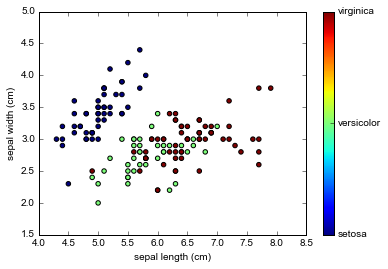

In [9]:
def plot_iris_projection(x_index, y_index):
    # formatter позволяет сопосотавить номера классов с именами классов для отображения на colorbar
    formatter = FuncFormatter(lambda i, *args: iris.target_names[int(i)])

    scatter(iris.data[:, x_index], iris.data[:, y_index],
                c=iris.target)
    colorbar(ticks=[0, 1, 2], format=formatter)
    xlabel(iris.feature_names[x_index])
    ylabel(iris.feature_names[y_index])
    
plot_iris_projection(0, 1)

**Найдите такую комбинацию** `x_index` и `y_index`, чтобы получить максимальное разделение трех классов.

Это упражнение даст вам понимание, как лучше сократить количество измерений, что мы будем делать позже, в разделе **сокращение размерности**.

In [5]:
''' alternative source of iris data
https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv
'''
from sklearn.datasets import load_iris
iris = load_iris()
# print(iris.DESCR)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Набор данных загружается в виде объекта ``Bunch()``, который содержит данные в поле `data` и другую вспомогательную информацию.

In [6]:
print( iris.data.shape)
print( iris.target.shape)

(150, 4)
(150,)


`target` - и есть вектор с правильными ответами, "целями" для алгоритма обучения

Далее мы сделаем традиционную таблицу на основе модуля `pandas`

In [44]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
# Add in the Iris Id data
df['species'] = iris['target']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Колонку с указателем вида переделаем в строки с именами из `iris.target_names`

In [45]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
for i, target_name in enumerate(iris.target_names):
    df.loc[df['species']==i, 'species'] = iris.target_names[i]
# Проверим какие значения теперь в этой колонке
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [47]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Категории обычно отображают разными цветами для наглядного представления распределения в пространстве признаков.

Отобразим на скаттерограмме первых два признака:

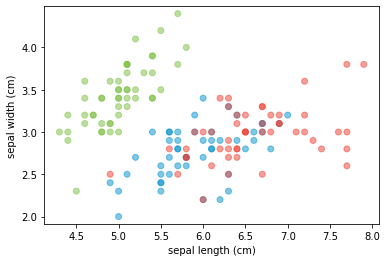

In [20]:
species_color = {'versicolor': "#0392cf", 
               'setosa'    : "#7bc043", 
               'virginica': "#ee4035"}
colors = df["species"].map(species_color)
scatter(x=df["sepal length (cm)"], y=df["sepal width (cm)"], 
        c = colors, alpha=0.5);
xlabel("sepal length (cm)")
ylabel("sepal width (cm)")
axis('equal');

4-мерные данные сложно представить. Для изучения соотношений между разными показателями используют попарное представления всех со всеми.

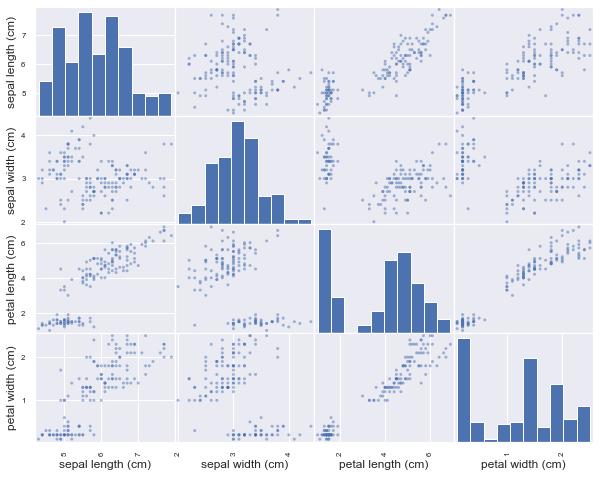

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=[10,8]);

Видно, что некоторые характеристики тесно связаны, например, ширина и длина лепестков: облако точек вытянуто по диагонали. 

Раскрасить точки разными цветами можно с помощью параметра color=, но для этого надо сгенерить цвет для каждой точки, напр. так:
```py
color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = iris["target"].map(lambda x: color_wheel.get(x + 1))
```

А для отображения трех разноцветных гистограмм распределения их преобразуют в сглаженные кривые, которые не мешают восприятию при наложении друг на друга.

Как это обычно бывает, для специальных нужд надо создать свою функцию рисования (или найти в интернете хороший образец, требующий минимальной доработки).

{'versicolor': '#e41a1c', 'setosa': '#377eb8', 'virginica': '#4eae4b'}

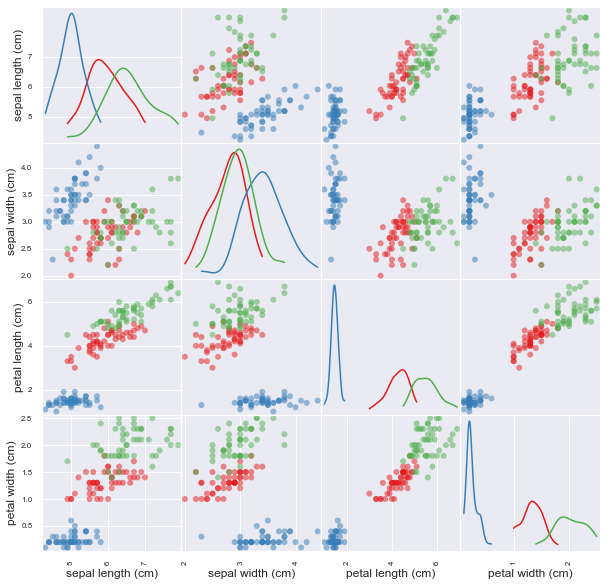

In [31]:
def factor_scatter_matrix(df, factor, palette=None):
    import matplotlib.colors
    import numpy as np
    from pandas.plotting import scatter_matrix
    from scipy.stats import gaussian_kde

    if isinstance(factor, str):
        factor_name = factor
        factor = df[factor]
        df = df.drop(factor_name,axis=1) # удаляем фактор из данных 

    classes = list(set(factor))

    #подбираем цвета
    if palette is None:  #авто цвета на 9 групп
        palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))
    colors = factor.apply(lambda group: color_map[group])
    
    #рисуем скаттерограммы
    axx = scatter_matrix(df,figsize=(10,10),marker='o',c=colors,diagonal=None)

    #рисуем плотности для классов
    for i,k in enumerate(df.columns):
        for group in classes:
            y = df[factor == group][k].values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axx[i][i].plot(ind, gkde.evaluate(ind),c=color_map[group])

    #возвращаем ссылки на рисунки и цветовую карту
    return axx, color_map

axarr, color_map = factor_scatter_matrix(df, 'species');
color_map

Поскольку такое отображение данных весьма востребовано, то этот функционал реализован в более продвинутых версиях построителей скаттерограмм.

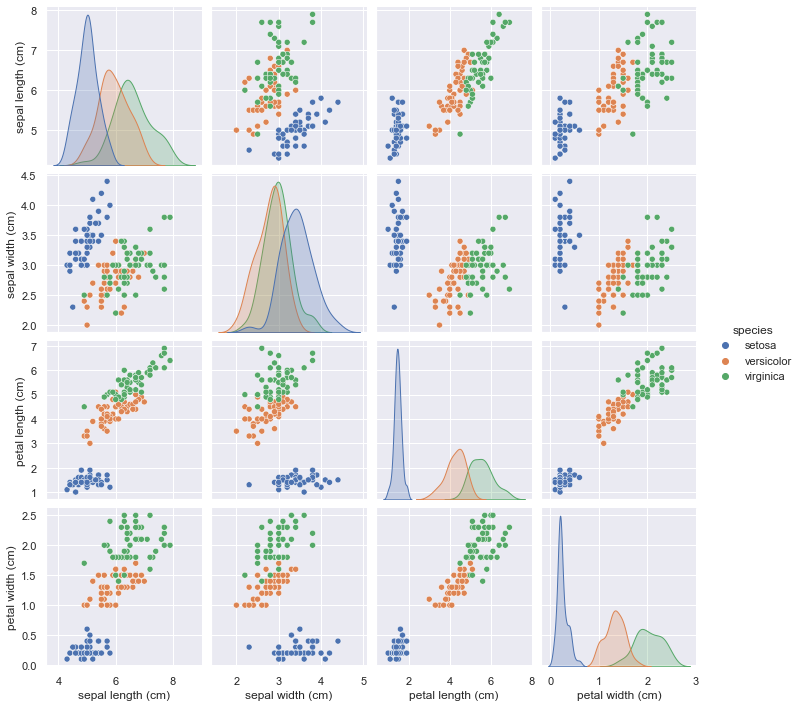

In [32]:
sns.set()
#df = seaborn.load_dataset("iris")
sns.pairplot(df, hue="species", height=2.5);

Данная функция для построения парных рисунков сама берет данные для легенды и выводит гистограммы в диагональных рисунках.
Конечно она позволяет выполнить дополнительные настройки отображения.

При сравнении взаимного распределения по двум факторам гистограммы распределений как бы перпендикулярны друг другу.

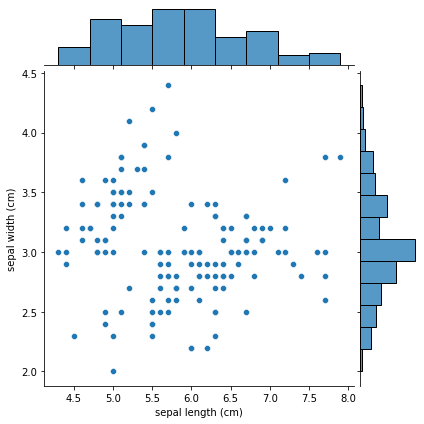

In [34]:
sns.reset_orig()
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=df, space=0.1);

Если представить все характеристики в ряд, и соединить *паралелльные координаты* линиями, то объекты, входящие в кластер, выглядят ближе к друг другу.

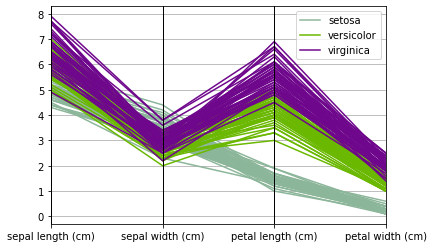

In [36]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'species');

Кривые Эндрюса (Andrews curves) позволяют представить многомерные данные в виде большого числа кривых, которые синтезируются как сигналы, восстановленные из разложения Фурье, спектральные коэффициенты которого берутся из данных. При окраске этих кривых в разные цвета можно визуализировать кластеризацию данных.

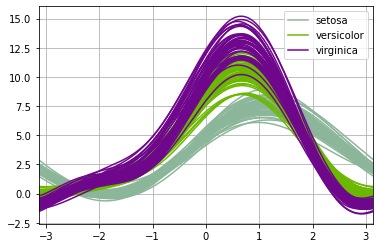

In [37]:
from pandas.plotting import andrews_curves
andrews_curves(df, 'species');

RadViz - еще один алгоритм для визуализации многомерных данных, основанный на метафоре минимизации натяжения струн.
Если измерения представить как опорные точки на плоскости, а отдельные объекты как разноцветные шарики, соединненные с опорными точками резиночками, жесткость которых пропорциональна числовым значениям в данных измерениях, то на рисунке образцы будут отображены в позициях равновесия.

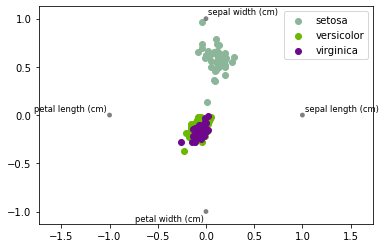

In [39]:
from pandas.plotting import radviz
radviz(df, 'species');

## Ценность признаков

Если признаков много - как отобрать самые информативные?

Отличный первый шаг - проранжировать признаки с помощью метрики полезности - функции, измеряющей связи между признаком и целевыми отметками класса. Наиболее универсальная метрика - взаимная информация (mutual information).

Взаимная информация очень похожа на корреляцию в том смысле, что она измеряет отношение между двумя величинами. Преимущество взаимной информации состоит в том, что она может обнаруживать любые отношения, в то время как корреляция обнаруживает только линейные отношения.
Взаимная информация описывает отношения в терминах неопределенности. 

*Взаимная информация* (MI) между двумя величинами является мерой того, насколько знание одной величины уменьшает неопределенность относительно другой. Если бы вы знали значение данного признака, насколько бы вы были более уверены в предсказании класса объекта?


https://www.kaggle.com/ryanholbrook/mutual-information

In [54]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [55]:
from sklearn.feature_selection import mutual_info_regression

X = df.iloc[:,:-1]
y = pd.Categorical(df['species']).codes

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

petal width (cm)     0.979388
petal length (cm)    0.970073
sepal length (cm)    0.500351
sepal width (cm)     0.233888
Name: MI Scores, dtype: float64

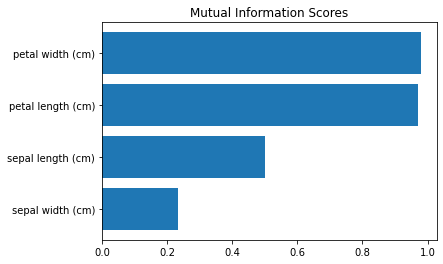

In [56]:
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
barh(width, scores)
yticks(width, ticks)
title("Mutual Information Scores");

Величина взаимной информации безразмерная обычно не более 2.0. Для полностью независимых случайных величин взаимная информация равна 0.

## Распределение в пространстве признаков

Два подхода:
1. Найти центроиды, вокруг которых "кучкуются"  представители соответствующих классов
2. Найти границы, которые делят всё пространство на области преобладания  соответствующих классов

## Дистанция

- геометрическая, euclidian
- редактирования
- прочие

### Пример. Логическая дистанция

кулинарные предпочтения 
характеристика: ест/ не ест

In [10]:
D = pd.DataFrame([], columns=['Homo Canis Felis Sus Мusca Drosophila'.split()])
D

,Homo,Canis,Felis,Sus,Мusca,Drosophila


In [11]:
D.ix['apple',:]=[1,1,0,1,1,1]
D

,Homo,Canis,Felis,Sus,Мusca,Drosophila
apple,1,1,0,1,1,1


## Классификаторы, имитирующие выработку иммунного ответа "свой-чужой"

- данные = антигены
- популяция антител эволюционирует для наилучшего распознования

полная классификация ~ 200 поколений 


![](VALIS_2017_img_3.jpg)

![](VALIS_2017_img_4.jpg)

![](VALIS_2017_img_5.jpg)

#### Использование искусственного интеллекта для прогнозирования вероятности выживаемости и необходимости хирургического вмешательства у лошадей с острым животом (колики)

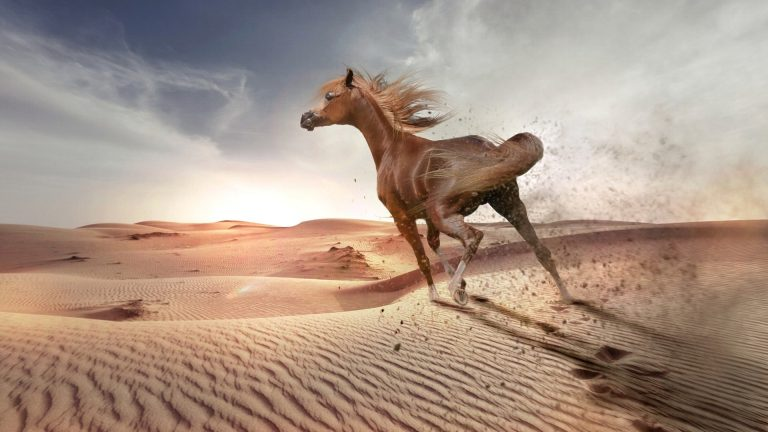

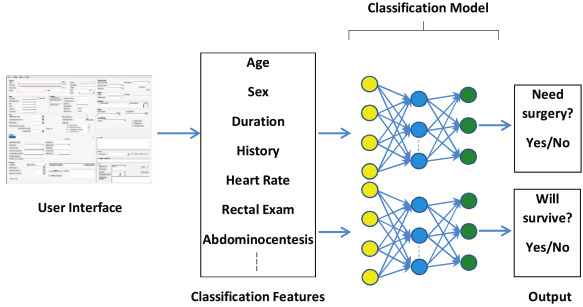

https://www.sciencedirect.com/science/article/pii/S0737080620300642
ветеринары из Иордании 

(с) https://www.touristjordan.com/horseback-riding-jordan/

Клинические признаки и результаты различных тестов подаются в классификационную модель, которая затем предсказывает, выживет ли лошадь или ей потребуется операция.

### Биометрия Животных

https://link.springer.com/chapter/10.1007/978-981-10-7956-6_2

### система распознавания крупного рогатого скота на основе отпечатка морды

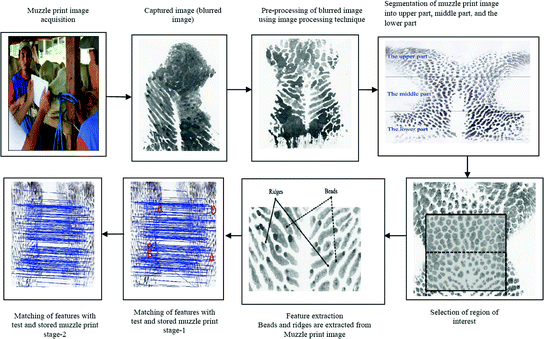

Алгоритм 2.1: алгоритм сбора данных/процедура получения изображения отпечатка морды крупного рогатого скота

1. голову крупного рогатого скота нужно держать неподвижно, используя прочную веревку.

2. Процесс очистки: очистка морды печатного изображения (носа) крупного рогатого скота для удаления соплей с помощью мягкого хлопка и салфеток.

3. удаление шума: как только сопли будут удалены из носа, используйте тонкий слой синих чернил с помощью мягкого хлопка на морде крупного рогатого скота.

4. выравнивание и движение: изображение печати морды крупного рогатого скота берется на белой бумаге а-5 с восходящим вращательным движением.

5. повторяйте шаги 2, 3 и 4 до тех пор, пока количество отпечатков морды не станет достаточным.

6. поднятое изображение печати морды крупного рогатого скота, запечатленное на белой бумаге а-5.

7. преобразование изображения: захваченные изображения печати морды необходимо преобразовать в цифровые изображения с использованием метода обработки изображений с разрешением 300 dpi.

8. предварительная обработка изображения отпечатка морды: последним этапом сбора и подготовки данных является оцифровка и предварительная обработка захваченных изображений отпечатка морды для идентификации крупного рогатого скота.

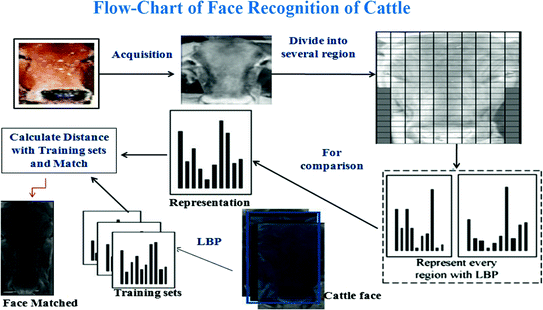

Блок-схема идентификации крупного рогатого скота по биометрическому признаку изображения лица

Kumar, S., & Singh, S. K. (2016). Monitoring of pet animal in smart cities using animal biometrics. Future Generation Computer Systems.

#### Метод генерации закодированных черт с помощью локальных бинарных паттернов (ЛБП, LBP).

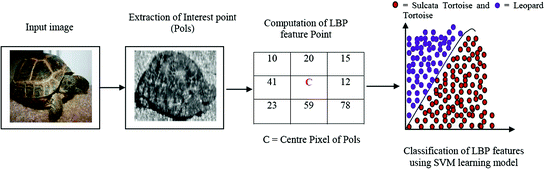

Идентификация черепах с использованием методов локального бинарного дескриптора признаков на основе паттернов


In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/nxW_ZtqqgXo?start=70" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

C:\a\WinPython\python-3.9.0rc1.amd64\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


<iframe width="560" height="315" src="https://www.youtube.com/embed/nxW_ZtqqgXo?start=70" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

https://youtu.be/nxW_ZtqqgXo?t=1m10s

## Примеры классификации

http://nbviewer.ipython.org/gist/RMDK/cbf1005e75cd04ad6921

http://datadryad.org/resource/doi:10.5061/dryad.r42qf


???
http://rspb.royalsocietypublishing.org/content/283/1845/20162159.figures-only

в странной статье, где изучали климатические условия в тропиках путем регистрации ЭЭГ у людей в офисе с кондиционером и без, сравнивали классификаторы, которые тупо предсказывали субъективный комфорт (по опроснику) по спектрам 8-сек 14-канальной ЭЭГ 
https://www.sciencedirect.com/science/article/pii/S0378778820311993

При редукции данных самый стабильный - НаивБайес

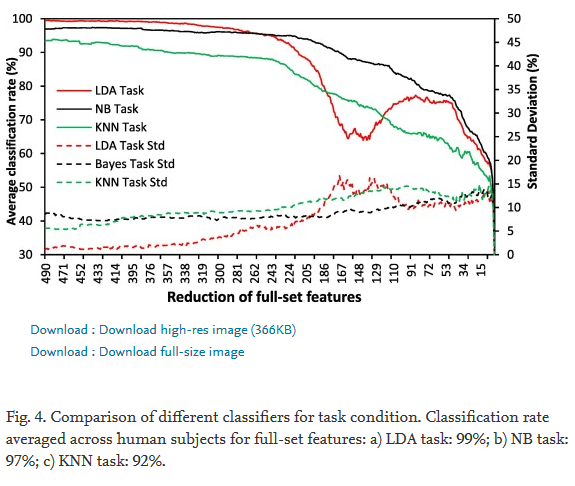

## Кластерный анализ. 

*Кластерный анализ* – это метод классификационного анализа; его основное назначение – разбиение множества исследуемых объектов и признаков на однородные в некотором смысле группы, или кластеры.

Кластерный анализ позволяет исследовать множество исходных данных произвольной природы.
Необходимо лишь определиться что сближает между собой объекты, а что отдаляет.

Задача кластерного анализа - разбить множество объектов на $m$ кластеров так, чтобы каждый объект принадлежал только одной группе разбиения. При этом объекты, принадлежащие одному кластеру, должны быть однородными (сходными), а объекты, принадлежащие разным кластерам, – разнородными. 

*Расстояние (distance)* между объектами - метрика сходства между объектами.

## Дискриминантный анализ. 

*Дискриминантный анализ* - старое название приемов классификации размеченных данных (от слова [discriminare](http://dic.academic.ru/dic.nsf/ita_rus/20636/discriminare) - различать), использующих стандартные статистические подходы.
Условия применимости классического дискриминантного анализа – независимые переменные–признаки должны быть привязаны к шкале (не категориальные), и их распределение должно соответствовать нормальному закону.

В последнее время разработано множество эффективных непараметрических методов классификации размеченных данных, то есть когда часть данных уже имеет правильные метки искомых классов наблюдений. Эта часть становится обучающей выборкой для обучения оптимального алгоритма классификации.

## Деревья классификации. 

Деревья классификации – это метод классификационного анализа, позволяющий предсказывать принадлежность объектов к тому или иному классу в зависимости от соответствующих значений признаков, характеризующих объекты. Признаки называются независимыми переменными, а переменная, указывающая на принадлежность объектов к классам, называется зависимой. В отличие от классического дискриминантного анализа, деревья классификации способны выполнять одномерное ветвление по переменными различных типов категориальным, порядковым, интервальным. Не накладываются какие-либо ограничения на закон распределения количественных переменных. По аналогии с дискриминантным анализом метод дает возможность анализировать вклады отдельных переменных в процедуру классификации. Деревья классификации могут быть, а иногда и бывают, очень сложными. Однако использование специальных графических процедур позволяет упростить интерпретацию результатов даже для очень сложных деревьев. Возможность графического представления результатов и простота интерпретации во многом объясняют большую популярность деревьев классификации в прикладных областях, однако, наиболее важные отличительные свойства деревьев классификации – их иерархичность и широкая применимость. Структура метода такова, что пользователь имеет возможность по управляемым параметрам строить деревья произвольной сложности, добиваясь минимальных ошибок классификации. Но по сложному дереву, из-за большой совокупности решающих правил, затруднительно классифицировать новый объект. Поэтому при построении дерева классификации пользователь должен найти разумный компромисс между сложностью дерева и трудоемкостью процедуры классификации. Широкая сфера применимости деревьев классификации делает их весьма привлекательным инструментом анализа данных, но не следует полагать, что его рекомендуется использовать вместо традиционных методов классификационного анализа. Напротив, если выполнены более строгие теоретические предположения, налагаемые традиционными методами, и выборочное распределение обладает некоторыми специальными свойствами (например, соответствие распределения переменных нормальному закону), то более результативным будет использование именно традиционных методов. Однако как метод разведочного анализа или как последнее средство, когда отказывают все традиционные методы, Деревья классификации, по мнению многих исследователей, не знают себе равных.



генетика
http://www.timetree.org/
http://datadryad.org/resource/doi:10.5061/dryad.ph602/1


Let us tuned the parameters of Random Forest just for the purpose of knowledge

There are 3 features which can be tuned to improve the performance of Random Forest

1) max_features 2) n_estimators 3) min_sample_leaf

A)max_features: These are the maximum number of features Random Forest is allowed to try in individual tree. 1)Auto : This will simply take all the features which make sense in every tree.Here we simply do not put any restrictions on the individual tree. 2)sqrt : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree. 3)log2:It is another option which takes log to the base 2 of the features input.

Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered.But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal max_features.

B) n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

C)min_sample_leaf: Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. Hence it is important to try different values to get good estimate.



### n_jobs

This parameter tells the engine how many processors is it allowed to use. A value of “-1” means there is no restriction whereas a value of “1” means it can only use one processor.


# Нейронные сети


Достоинства:
- устойчивы к шуму
- подходят для разных задач: классификация, детекция

Нейронные сети. Нейронные сети представляют собой вычислительную систему, архитектура которой имеет аналогию с построением нервной ткани из нейронов. На нейроны самого нижнего слоя подаются значения входных параметров, на основании которых нужно принимать определенные решения. Например, в соответствии со значениями клинико-лабораторных показателей больного надо отнести его к той или иной группе по степени тяжести заболевания. Эти значения воспринимаются сетью как сигналы, передающиеся в следующий слой, ослабляясь или усиливаясь в зависимости от числовых значений (весов), приписываемых межнейронным связям. В результате на выходе нейрона верхнего слоя вырабатывается некоторое значение, которое рассматривается как ответ – отклик всей сети на входные параметры. Для того, чтобы сеть работала ее надо «натренировать» (обучить) на данных для которых известны значения входных параметров и правильные отклики на них. Обучение состоит в подборе весов межнейронных связей, обеспечивающих наибольшую близость ответов к известным правильным ответам. Нейронные сети могут быть использованы для классификации наблюдений.

выполнение в железе - аналоговые схемы

используются FPGA

последние разработки - spiking neuron network (SNN) - 1bit сигнал - более эффективны по использованию памяти
Spike Timing Dependant Plasticity

In [ ]:
from sklearn.neural_network import MLPClassifier


Tuning the hyperparameters of the neural network

It is turning out to be computationally expensive for me with tuned model. Hence I am not running this. Also any suggestion to improvise it is welcome. :)

1) hidden_layer_sizes : Number of hidden layers in the network.(default is 100).Large number may overfit the data.

2)activation: Activation function for the hidden layer. A)‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)). B)‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x). C)‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

3)alpha: L2 penalty (regularization term) parameter.(default 0.0001)

4)max_iter: Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations.(default 200)


## Разные классификаторы подходят для разных задач

![](VALIS_Performance.png)

Vote-ALlocating Immune System (VALIS), k nearest neighbours (kNN), logistic regression (LR), linear and quadratic discriminant analysis (LDA, QDA), naive Bayes (NB), AdaBoost (AB), decision trees (CART), random forests (RF), support vector machines (SVM).

## Deep Learning

![](dnn.png)

DNN demonstrates surprisingly good prediction of hypertension and sleep apnea given that its only inputs are heart rate and step count.

https://cardiogr.am/research/

### Недостатки NN - сложность интерпретации

Попытки визуализации настройки нейронов в разных слоях за счет обобщения и рандомизации
https://distill.pub/2017/feature-visualization/

## Полуавтоматическое обучение

Система автоматически классифицирует объекты похожие на те, что в обучающей выборке, и привлекает человека в новых или неопределенных случаях. 

Позволяет привлечь компьютер уже на стадии разметки обучающей выборки.

<b class=tag>human-in-the-loop</b>
<b class=tag>тренировка ИИ</b>

Общедоступные сервисы https://www.crowdflower.com/

**Пример.**

Прогнозирование увядания побегов для агрокультуры - модель от толщины стебля и движения листьев.
www.sciencedirect.com/science/article/pii/S0950705117303507

## HTM - Hierarchical Temporal Memory

![](compare_neurons.jpg)

слева схематическое изображение биологического нейрона (пирамидального), посередине – изображение простого искусственного нейрона и справа - нейрона НТМ.

Каждая клетка НТМ имеет один проксимальный дендрит. Прямой ввод исходных данных в нее происходит с помощью синапсов (показаны зелеными кружочками). Активность таких синапсов линейно суммируется для получения прямой активации данной клетки. 

Каждая клетка НТМ содержит в себе список сегментов дистальных дендритов. При этом, каждый такой сегмент работает как некоторый пороговый детектор. Если число активных синапсов любого из таких сегментов клетки (показанных синими кружочками на вышеприведенной диаграмме) становится выше его порогового значения, данный сегмент становится активным и связанная с ним клетка переходит в состояние предчувствия (предсказания) поскольку это ее состояние является функцией логического ИЛИ от активации всех ее дистальных сегментов.

Сегмент дистальных дендритов запоминает нужное ему состояние региона НТМ путем формирования связей с его клетками, которые ранее были активны в один и тот же момент времени. Таким образом, сегмент запоминает состояние региона, которое предшествовало активации его клетки прямыми входными данными. А потом сегмент просто следит за состоянием этих «своих» клеток региона НТМ, активация которых предсказывает, что и его клетка станет сейчас активной. Типичный порог для дендритного сегмента равен 15. Если 15 действующих синапсов такого сегмента становятся сразу активными, данный дендрит также активизируется. Поблизости могут быть активными сотни и даже тысячи клеток региона, но существенными являются связи только с 15 из них для распознания большего паттерна. 

[Сравнение нейронов](http://babylon.wiki-wiki.ru/b/index.php/%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B5%D0%B6%D0%B4%D1%83_%D0%B1%D0%B8%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%BC%D0%B8_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%B0%D0%BC%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B5%D1%82%D0%BA%D0%B0%D0%BC%D0%B8_%D0%9D%D0%A2%D0%9C)

### Вариационный автоэнкодер

Вариационный автоэнкодер (VAE) опирается на эту концепцию, делая процесс реконструкции вероятностным. В этом случае латентные переменные берутся из определенного (обычно гауссовского) распределения, и обучение стремится оптимизировать как потери реконструкции, так и расхождение Кульбака-Лейблера между распределением кодированных изображений и латентными переменными, соответствующими декодированным изображениям в латентном пространстве. Одной из наиболее привлекательных особенностей VAEs является их способность распутывать представления данных, т. е. обнаружение специфических черт, таких как стили почерка в данных MNIST, эмоции на человеческих лицах или сложные многообразия, определяющие степени свободы в роботизированных системах.

Решает задачу главных компонент, только средствами нейросети.



# Оценка классификационных моделей

После обучения модели необходимо оценить производительность классификатора с помощью тестового набора. Точность модели измеряется вычислением процента неправильно классифицированных данных в обучении и в тестовом наборе. Индекс точности определяется отношением числа правильно классифицированных точек данных к общему числу точек данных.

Недостаточное оснащение присутствует, если точность измерения в обучающем наборе низкая. Напротив, когда точность, измеренная на тренировочном наборе, намного выше точности, измеренной на тестовом наборе, может возникнуть проблема переоснащения. Следовательно, в хорошем классификаторе точность, измеряемая как в обучении, так и в тестовом наборе, должна быть высокой.

Некоторые методы могут быть использованы для предотвращения наличия переобучения. В следующем разделе рассматривается более часто используемый метод предотвращения переоснащения: метод K-кратной перекрестной проверки.

Наличие недоукомплектованности может быть исправлено путем увеличения сложности модели классификатора. Наличие переобучения, с другой стороны, труднее оценить, некоторые методы могут быть использованы для предотвращения или смягчения переобучения.

Метод, используемый в деревьях принятия решений для предотвращения переобучения, - это обрезка. Существует две стратегии обрезки: предварительная и последующая. Первый-остановить построение дерева до того, как оно слишком сильно адаптируется к обучающему набору, а пост-обрезка, с другой стороны, предполагает подход снизу вверх, который выполняется после завершения построения модели, цель которого-устранить лишние части дерева.

Хорошо известными методами предотвращения переобучения в классификации машинного обучения являются методы повторной выборки, в которых обучающий набор случайным образом разбивается на подмножества и подмножество используется для оценки точности классификации.

Обзор хорошо известной терминологии в бинарной классификации для положительного класса P и отрицательного класса N:

-    Истинный положительный результат (TP). Мы классифицируем сегмент как истинно положительный, если модель предсказала его как аномально положительный, и на самом деле (ground truth) также является аномально положительным.
-    Ложноположительный результат (FP). Если модель предсказала его как положительный (аномалия), а на самом деле  отрицательна (“нормальный”).
-    Ложноотрицательный (FN). Если модель предсказала его как отрицательный класс (“нормальный”), а на самом деле положительна (аномалия).
-    Истинно Отрицательный (TN). Если и модель, и основная истина предполагают, что сегмент является отрицательным.

Классификационные метрики:

    Точность Precision  (Pre) PPV: это доля правильно помеченных экземпляров по сравнению с общим количеством помеченных экземпляров. Вы можете думать об этом так: из положительно классифицированных случаев, сколько я получил правильно?

$$Pre = TP / (TP + FP)$$

    Чувствительность, Отклик Recall (Rec): это доля правильно помеченных точек над общим числом. Вы можете думать об этом как о действительно положительных примерах, сколько из них я идентифицировал?

$$Rec = TP / (TP + FN)$$

    Оценка F1 Score: является гармоническим средним значением точности и отзыва

$$F1 = 2 · Pre · Rec / (Pre + Rec)$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/PPV%2C_NPV%2C_Sensitivity_and_Specificity.svg/881px-PPV%2C_NPV%2C_Sensitivity_and_Specificity.svg.png)

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

F1-мера больше подходит для несбалансированных классов.

Если классы несбалансированы, то используют выравнивание или отбрасывая лишних представителей большего класса (under-sampling) или пополняя малочисленный класс (over-sampling).
Методы подвыборки и сверхвыборки значительно повышают оценку F1. Однако этот прирост производительности происходит за счет  качества моделей.

Для сверхвыборки вы можете либо копировать случайные наблюдения, либо создавать синтетические наблюдения, используя проверенные алгоритмы, такие как метод Synthetic Minority Oversampling TEchnique (SMOTE), который выбирает близкие образцы и, рисуя линию между ними, создает новый образец в точках вдоль этой линии.



## Анализ качества

- **Оценка вклада признака**: для проверки того, являются ли прогнозы вашей модели предвзятыми или справедливо распределены между входными переменными.
- **Оценка устойчивости к случайному шуму**: чтобы проверить, устойчива ли ваша модель к введению зашумленных данных.
- **Оценка устойчивости к экстремальному шуму**: чтобы проверить, устойчива ли ваша модель к введению зашумленных данных в наихудшем из возможных случае.


$$Snitch Quality Score = 0.45 \cdot FCS + 0.45 \cdot RNRS + 0.1 \cdot ENRS$$

$FCS$ - Feature Contribution Score, $RNRS$ - Random Noise Robustness Score, $ENRS$ - Extreme Noise Robustness Score

https://help.snit.ch/article/19-quality-analysis

### mean absolute percentage error (MAPE)

### Кросс-Валидация методом К-Сложения 

обучающий набор разбивается случайным образом на K подмножеств, называемых сгибами. Первоначально первая складка используется в качестве тестового набора (проверочного набора), а остальные складки объединяются для использования в качестве обучающего набора. Алгоритм является итеративным: в любом цикле K-я складка, k = 1,..., K, является набором проверки, применяемым для проверки классификатора, построенного на этапе обучения, объединяющего другие складки.

Среднее значение результатов классификатора K используется для классификации нового паттерна. Для оценки производительности вычисляется среднее значение K показателей точности: оно позволяет обучать и тестировать модель K раз на различных подмножествах обучающего набора данных и строить оценку производительности модели машинного обучения на невидимых данных.

![](https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-3-030-44613-0_11/MediaObjects/475102_1_En_11_Fig1_HTML.png)

Схема четырехкратной методики перекрестной валидации

### Платформы

[Reproducible Experiment Platform](http://yandex.github.io/rep/) от Яндекс Обертка над несколькими библиотеками

[AzureML](https://studio.azureml.net/)

[Автоматический подбор моделей](https://automodel.rapidminer.com/)

### +++:

[Оценка качества в задачах классификации](http://neerc.ifmo.ru/wiki/index.php?title=Оценка_качества_в_задачах_классификации)

[Шабанов Д. А. Кластеры, клады и химера объективности. 2011](https://batrachos.com/Кластеры_клады_и_химера_объективности)

[Шабанов Д. А. Ложь, наглая ложь и… // Компьютерра, М., 2006. – № 25–26 (645–646)](https://batrachos.com/Ложь_наглая_ложь_и)

[NEXUS Tree format](https://en.wikipedia.org/wiki/Newick_format)

[Weka 3: Data Mining Software in Java](http://www.cs.waikato.ac.nz/ml/weka/) и [курс от создателей](http://www.cs.waikato.ac.nz/ml/weka/mooc/dataminingwithweka/)

Cihan P. et al. A review of machine learning applications in veterinary field //Kafkas Univ Vet Fak Derg. – 2017. – Т. 23. – №. 4. – С. 673-680.

Liu, N. T., & Salinas, J. (2017). Machine Learning for Predicting Outcomes in Trauma. Shock: Injury, Inflammation, and Sepsis: Laboratory and Clinical Approaches, 48(5), 504–510. https://doi.org/10.1097/SHK.0000000000000898


